In [474]:
import pandas as pd 
import numpy as np
# use kmeans and plot the cluster 
from sklearn.cluster import KMeans
pd.options.mode.chained_assignment = None
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas

In [475]:
df_mac = pd.read_csv('csv_files/mac_data.csv')
df_windows = pd.read_csv('csv_files/windows_data.csv')

In [476]:
df_mac.head()


,Keycode,Keyname,Keycount
0,49,1,1061
1,50,2,757
2,51,3,629
3,52,4,502
4,53,5,468


In [477]:
df_windows.head()


,Keycode,Keyname,Keycount
0,49,1,889
1,50,2,588
2,51,3,683
3,52,4,317
4,53,5,315


In [478]:
# we don't need the keycode
df_mac = df_mac.drop('Keycode', axis=1)
df_windows = df_windows.drop('Keycode', axis=1)

In [479]:
df_mac.head()

,Keyname,Keycount
0,1,1061
1,2,757
2,3,629
3,4,502
4,5,468


In [480]:
df_windows.head()

,Keyname,Keycount
0,1,889
1,2,588
2,3,683
3,4,317
4,5,315


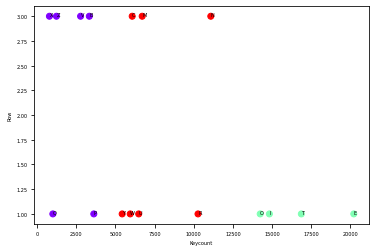

In [481]:
# TODO: old kmeans code, not used anymore maybe salvage this? 

df_mac['Row'] = 0
df_windows['Row'] = 0
first_row = ['Q', 'W', 'E', 'R', 'T', 'Y', 'U', 'I', 'O', 'P']
second_row = ['A', 'S', 'D', 'F', 'G', 'H', 'J', 'K', 'L']
third_row = ['Z', 'X', 'C', 'V', 'B', 'N', 'M']


for i in range(len(df_mac)):
    if df_mac['Keyname'][i] in first_row and df_windows['Keyname'][i] in first_row:
        df_mac['Row'][i] = 1
        df_windows['Row'][i] = 1
    elif df_mac['Keyname'][i] in second_row and df_windows['Keyname'][i] in first_row:
        df_mac['Row'][i] = 2
        df_windows['Row'][i] = 2
    elif df_mac['Keyname'][i] in third_row and df_windows['Keyname'][i] in third_row:
        df_mac['Row'][i] = 3
        df_windows['Row'][i] = 3
    else: 
        df_mac['Row'][i] = None
        df_windows['Row'][i] = None

# export to csv to see 
#do kmeans on keycount and row


df_mac = df_mac.dropna()
df_windows = df_windows.dropna()

kmeans_mac = KMeans(n_clusters=3, random_state=0).fit(df_mac[['Keycount', 'Row']])

# plot the cluster
plt.scatter(df_mac['Keycount'], df_mac['Row'], c=kmeans_mac.labels_, cmap='rainbow')
plt.xlabel('Keycount')
plt.ylabel('Row')
# write the file to output.png

df_mac.head()
# reassign the indexes 
df_mac = df_mac.reset_index(drop=True)

# add the keyname to the annotation 
for i in range(len(df_mac)):
   plt.annotate(df_mac['Keyname'][i], (df_mac['Keycount'][i] , df_mac['Row'][i] ) )

# readjust the axis
plt.savefig('plots/output.png')

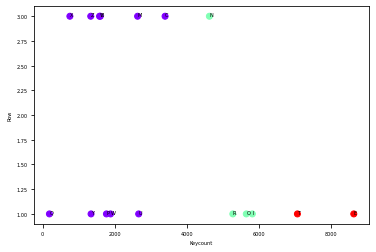

In [482]:
kmeans_windows = KMeans(n_clusters=3, random_state=0).fit(df_windows[['Keycount', 'Row']])

plt.scatter(df_windows['Keycount'], df_windows['Row'],
            c=kmeans_windows.labels_, cmap='rainbow')
plt.xlabel('Keycount')
plt.ylabel('Row')
# write the file to output.png

df_windows.head()
# reassign the indexes
df_windows = df_windows.reset_index(drop=True)

# add the keyname to the annotation
for i in range(len(df_windows)):
   plt.annotate(df_windows['Keyname'][i],
                (df_windows['Keycount'][i], df_windows['Row'][i]))

# readjust the axis
plt.savefig('plots/output_windows.png')

In [483]:
df_graph_mac = pd.read_csv('csv_files/mac_data.csv')
df_graph_windows = pd.read_csv('csv_files/windows_data.csv')

In [484]:
# replace keyname, keycount, row as windows_keyname, windows_keycount
df_graph_windows = df_graph_windows.rename(columns={'Keyname': 'windows_keyname','Keycount': 'windows_keycount'})
df_graph_mac = df_graph_mac.rename(columns={'Keyname': 'mac_keyname','Keycount': 'mac_keycount'})

In [485]:
# if keynames match then add them to a third dataframe
df = pd.DataFrame(columns=['mac_keyname', 'mac_keycount', 'windows_keyname', 'windows_keycount'])
for i in range(len(df_graph_mac)):
    for j in range(len(df_graph_windows)):
        if df_graph_mac['mac_keyname'][i] == df_graph_windows['windows_keyname'][j]:
            df = df.append({'mac_keyname': df_graph_mac['mac_keyname'][i], 'mac_keycount': df_graph_mac['mac_keycount'][i], 'windows_keyname': df_graph_windows['windows_keyname'][j], 'windows_keycount': df_graph_windows['windows_keycount'][j]}, ignore_index=True)

In [487]:
# remove the mac_keyname
df = df.drop('mac_keyname', axis=1)

# move the windows_keyname to the front
df = df[['windows_keyname', 'mac_keycount', 'windows_keycount']]
df['mac_key_frequency'] = df['mac_keycount']

mac_key_freq = np.array(df['mac_keycount'])

mac_key_freq = mac_key_freq/np.sum(mac_key_freq)

windows_key_freq = np.array(df['windows_keycount'])

windows_key_freq = windows_key_freq/np.sum(windows_key_freq)

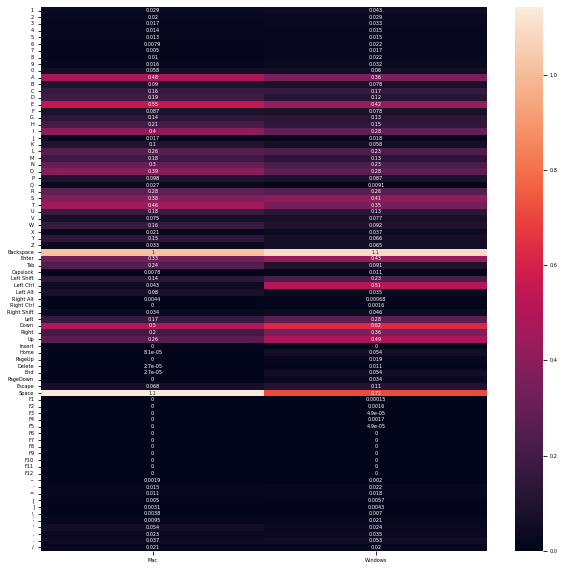

In [488]:
combined = np.array([mac_key_freq, windows_key_freq]) 

combined = combined.astype(np.float32)

combined = np.transpose(combined)

combined = combined *10 # out of 10 keys, how many times do you use it

sns.heatmap(combined, annot=True, xticklabels=['Mac', 'Windows'], yticklabels=df['windows_keyname'])

# change the size bigger 
plt.gcf().set_size_inches(10, 10)

# # change the font size of the labels
plt.yticks(rotation=0, fontsize=5)
plt.xticks(rotation=0, fontsize=5)
# change the size of the labels 
plt.rcParams['font.size'] = 5
plt.savefig('plots/output.svg')

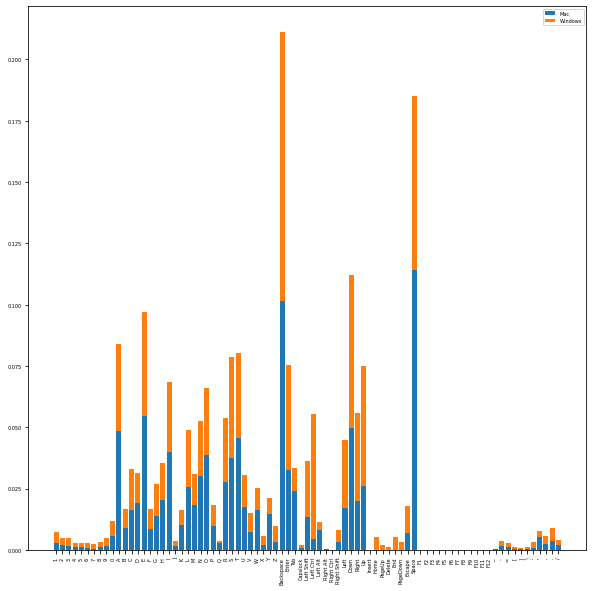

In [489]:
# do a stacked_histogram
mac_freq = np.array(df['mac_keycount']) 
windows_freq = np.array(df['windows_keycount']) 

mac_freq = mac_freq/np.sum(mac_freq) 
windows_freq = windows_freq/np.sum(windows_freq) 

mac_freq= mac_freq
windows_freq = windows_freq

plt2 = plt.figure() 
# labels are the keynames
plt2 = plt.bar(df['windows_keyname'], mac_freq, label='Mac')
plt2 = plt.bar(df['windows_keyname'], windows_freq, bottom=mac_freq, label='Windows')
plt2 = plt.xticks(rotation=90)
plt2 = plt.legend()

# make the size bigger
plt2 = plt.gcf().set_size_inches(10, 10)
# change the font size of the labels
plt2 = plt.yticks(rotation=0, fontsize=5)
plt2 = plt.savefig('plots/output2.svg')